# Classification 
Abstract: The purpose of this study was to examine associations between the physical characteristics of mushrooms, and to build a model that accurately predicts the edibility of a mushroom given these characteristics.    

Source Link: https://www.kaggle.com/uciml/mushroom-classification
File name used: mushrooms.csv

Evaluation strategy: Accuracy is used as an evaluation strategy because accuracy is easy to understand and easily suited for binary as well as a multiclass classification problem.

There are no missing values in the original datasets, values are manually removed.


### Importing required libraries

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline
import warnings

In [2]:
#Reading the Data set
dataset = pd.read_csv('mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
# removing missing values from column 'stalk-root = '?'
dataset = dataset[dataset['stalk-root'] != '?']

In [5]:
#shape of the data set
dataset.shape

(5644, 23)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5644 entries, 0 to 8114
Data columns (total 23 columns):
class                       5644 non-null object
cap-shape                   5644 non-null object
cap-surface                 5644 non-null object
cap-color                   5644 non-null object
bruises                     5644 non-null object
odor                        5644 non-null object
gill-attachment             5644 non-null object
gill-spacing                5644 non-null object
gill-size                   5644 non-null object
gill-color                  5644 non-null object
stalk-shape                 5644 non-null object
stalk-root                  5644 non-null object
stalk-surface-above-ring    5644 non-null object
stalk-surface-below-ring    5644 non-null object
stalk-color-above-ring      5644 non-null object
stalk-color-below-ring      5644 non-null object
veil-type                   5644 non-null object
veil-color                  5644 non-null object
ring-number

In [7]:
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##### introducing NaN values as the original data set did not have null values

In [8]:
#introducing NaN values as the original data set did not have null values
X = dataset.iloc[:,1:23]  #all features and no labels
y = dataset.iloc[:, 0]  # all labels only

for i in range((int)(X.size * 0.1)):
    row_index = np.random.randint(X.shape[0])
    col_index = np.random.randint(X.shape[1])
    col = X.columns[col_index]
    X.iloc[row_index][col] = np.nan

# Check what percentage of the data is missing
val = 0
for col in X.columns:
    val += X[col].count()

#print(val / X.size)

In [9]:
#NULL VALUES IN THE DATA SET
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,NaN,p,f,c,n,k,NaN,...,s,w,w,p,NaN,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,NaN,...,s,w,w,p,w,NaN,p,n,n,g
2,b,s,w,t,l,NaN,c,b,n,e,...,s,w,w,p,w,NaN,NaN,NaN,n,m
3,x,y,w,t,p,f,NaN,n,n,e,...,s,w,w,NaN,w,o,p,NaN,s,u
4,NaN,s,NaN,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [10]:
#TOTAL NUMBER OF NAN's IN EACH COLUMN
X.isna().sum()

cap-shape                   561
cap-surface                 542
cap-color                   536
bruises                     521
odor                        534
gill-attachment             550
gill-spacing                529
gill-size                   537
gill-color                  560
stalk-shape                 559
stalk-root                  529
stalk-surface-above-ring    527
stalk-surface-below-ring    548
stalk-color-above-ring      553
stalk-color-below-ring      549
veil-type                   494
veil-color                  525
ring-number                 517
ring-type                   517
spore-print-color           539
population                  544
habitat                     531
dtype: int64

### DATA IMPUTATION - imputing with most commonly occuring value( as its a mushroom data set that predicts if it is poisonous or edible)

In [11]:
df_most_common_imputed = X.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,t,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,t,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,n,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,w,y,d
8001,x,y,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,n,y,p
8038,x,y,g,t,n,f,c,b,w,e,...,s,w,w,p,w,t,p,w,y,p
8095,x,y,c,f,n,f,c,b,y,e,...,y,c,c,p,w,n,n,w,c,d


In [12]:
#TOTAL NUMBER OF NAN's IN EACH COLUMN AFTER IMPUTING NAN's
df_most_common_imputed.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
#JOINING THE Y-LABEL(OUTPUT COLUMN)
df_cat = df_most_common_imputed.join(y)
df_cat

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,t,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,t,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,n,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,d,e
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,n,y,p,e
8038,x,y,g,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,y,p,e
8095,x,y,c,f,n,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p


In [14]:
#22 features and 1 label, 8124 instances

df_cat['class'].unique() # Two classifications , either Edible(e) or poisionous(p)

array(['p', 'e'], dtype=object)

### CONVERTING CATEGORICAL TO NUMERICAL - creating dummies where needed as per the column description and values and applying map for columns with only two types of unique values

In [15]:
cols = pd.get_dummies(df_cat['cap-shape'], prefix= 'cap-shape')
df_cat[cols.columns] = cols
df_cat.drop('cap-shape', axis = 1, inplace = True)

In [16]:
cols = pd.get_dummies(df_cat['cap-surface'], prefix= 'cap-surface')
df_cat[cols.columns] = cols
df_cat.drop('cap-surface', axis = 1, inplace = True)

In [17]:
cols = pd.get_dummies(df_cat['cap-color'], prefix= 'cap-color')
df_cat[cols.columns] = cols
df_cat.drop('cap-color', axis = 1, inplace = True)

In [18]:
df_cat['bruises'].unique()

array(['t', 'f'], dtype=object)

In [19]:
df_cat['bruises'] = df_cat['bruises'].map({'f':0, 't':1}).astype(float)

In [20]:
cols = pd.get_dummies(df_cat['odor'], prefix= 'odor')
df_cat[cols.columns] = cols
df_cat.drop('odor', axis = 1, inplace = True)

In [21]:
cols = pd.get_dummies(df_cat['gill-attachment'], prefix= 'gill-attachment')
df_cat[cols.columns] = cols
df_cat.drop('gill-attachment', axis = 1, inplace = True)

In [22]:
cols = pd.get_dummies(df_cat['gill-spacing'], prefix= 'gill-spacing')
df_cat[cols.columns] = cols
df_cat.drop('gill-spacing', axis = 1, inplace = True)

In [23]:
df_cat['gill-size'].unique()

array(['n', 'b'], dtype=object)

In [24]:
df_cat['gill-size'] = df_cat['gill-size'].map({'b':0, 'n':1}).astype(float)

In [25]:
cols = pd.get_dummies(df_cat['gill-color'], prefix= 'gill-color')
df_cat[cols.columns] = cols
df_cat.drop('gill-color', axis = 1, inplace = True)

In [26]:
df_cat['stalk-shape'].unique()

array(['t', 'e'], dtype=object)

In [27]:
df_cat['stalk-shape'] = df_cat['stalk-shape'].map({'e':0, 't':1}).astype(float)

In [28]:
cols = pd.get_dummies(df_cat['stalk-root'], prefix= 'stalk-root')
df_cat[cols.columns] = cols
df_cat.drop('stalk-root', axis = 1, inplace = True)

In [29]:
cols = pd.get_dummies(df_cat['stalk-surface-above-ring'], prefix= 'stalk-surface-above-ring')
df_cat[cols.columns] = cols
df_cat.drop('stalk-surface-above-ring', axis = 1, inplace = True)

In [30]:
cols = pd.get_dummies(df_cat['stalk-surface-below-ring'], prefix= 'stalk-surface-below-ring')
df_cat[cols.columns] = cols
df_cat.drop('stalk-surface-below-ring', axis = 1, inplace = True)

In [31]:
cols = pd.get_dummies(df_cat['stalk-color-above-ring'], prefix= 'stalk-color-above-ring')
df_cat[cols.columns] = cols
df_cat.drop('stalk-color-above-ring', axis = 1, inplace = True)

In [32]:
cols = pd.get_dummies(df_cat['stalk-color-below-ring'], prefix= 'stalk-color-below-ring')
df_cat[cols.columns] = cols
df_cat.drop('stalk-color-below-ring', axis = 1, inplace = True)

In [33]:
df_cat['veil-type'].unique()

array(['p'], dtype=object)

In [34]:
df_cat['veil-type'] = df_cat['veil-type'].map({'p':0, 'u':1}).astype(float)

In [35]:
cols = pd.get_dummies(df_cat['veil-color'], prefix= 'veil-color')
df_cat[cols.columns] = cols
df_cat.drop('veil-color', axis = 1, inplace = True)

In [36]:
df_cat['ring-number'].unique()

array(['o', 't', 'n'], dtype=object)

In [37]:
df_cat['ring-number'] = df_cat['ring-number'].map({'n':0, 'o':1,'t':2}).astype(float)

In [38]:
cols = pd.get_dummies(df_cat['ring-type'], prefix= 'ring-type')
df_cat[cols.columns] = cols
df_cat.drop('ring-type', axis = 1, inplace = True)

In [39]:
cols = pd.get_dummies(df_cat['spore-print-color'], prefix= 'spore-print-color')
df_cat[cols.columns] = cols
df_cat.drop('spore-print-color', axis = 1, inplace = True)

In [40]:
cols = pd.get_dummies(df_cat['population'], prefix= 'population')
df_cat[cols.columns] = cols
df_cat.drop('population', axis = 1, inplace = True)

In [41]:
cols = pd.get_dummies(df_cat['habitat'], prefix= 'habitat')
df_cat[cols.columns] = cols
df_cat.drop('habitat', axis = 1, inplace = True)

In [42]:
df_cat['class'].unique()

array(['p', 'e'], dtype=object)

In [43]:
df_cat['class'] = df_cat['class'].map({'p':0, 'e':1}).astype(float)#Poisonous = 0, edible = 1

In [44]:
#after converting categorical to numerical values using label encoding
mush_df =df_cat
mush_df.head()

,bruises,gill-size,stalk-shape,veil-type,ring-number,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,1.0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,1.0,0.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
#CHECKING how many rows are having y label as 1- Edible and  0 - poisonous
print(mush_df.groupby('class').size())

class
0.0    2156
1.0    3488
dtype: int64


In [46]:
#CREATING LIST OF 5 NUMERICAL VARIABLES TO FIND THE CORRELATION
mush_df_7 = mush_df[['bruises','gill-size', 'stalk-shape','veil-type', 'ring-number']]

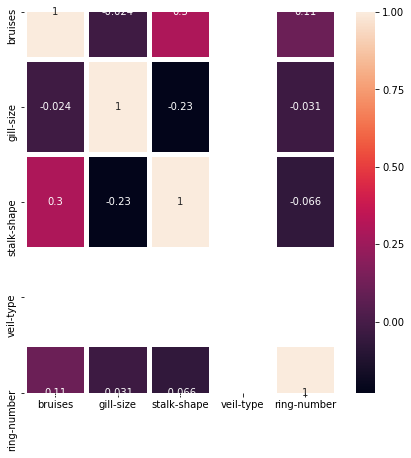

In [47]:
a = mush_df_7.corr()
fig=plt.figure(figsize=(7,7))
sns.heatmap(a,annot= True,linewidths=4)

#### There is no correlation between the variables, 0.3 is not being considered as high correlation in this case.

### Splitting the data into train and test

In [49]:
# Splitting the dataset into the Training set and Test set (train = 80% and test = 20%)
from sklearn.model_selection import train_test_split
X = mush_df.drop('class',axis=1)
y = mush_df['class']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [50]:
#feature scaling using MinMax scaling as the data isn't uniformly distributed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [82]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## <font color=blue>1. Logistic Regression  </font>

In [66]:
# Fitting lr to the Training set
from sklearn.linear_model import LogisticRegression
classifier_Log = LogisticRegression()
classifier_Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier_Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier_Log.score(X_test, y_test)))

Train score: 0.9967
Test score: 0.9956


####  Logistic regression confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = classifier_Log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       429
         1.0       0.99      1.00      1.00       700

    accuracy                           1.00      1129
   macro avg       1.00      0.99      1.00      1129
weighted avg       1.00      1.00      1.00      1129

accuracy: 0.9956


### Logistic regression Gridsearch

In [68]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.01, 0.1, 1, 10, 100,1000], 'penalty': ['l2','l1']}]
grid_search = GridSearchCV(estimator = classifier_Log,
                           param_grid = parameters,
                           scoring = 'accuracy', cv=5, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [69]:
accuracy = grid_search.best_score_
accuracy

0.9966777408637874

#### Fitting Logistic regression with the best parameters from Gridsearch

In [70]:
from sklearn.linear_model import LogisticRegression
classifier_Log = LogisticRegression(penalty = 'l2', C = 10)
classifier_Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier_Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier_Log.score(X_test, y_test)))

Train score: 0.9989
Test score: 0.9973


In [71]:
### Logistic Cross validation (penality:l2, C:10)
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(classifier_Log,X_train,y_train,cv=5)
test_score_list = cross_val_score(classifier_Log,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9967
Avg Test Score:0.9920


In [72]:
from sklearn.linear_model import LogisticRegression

c_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

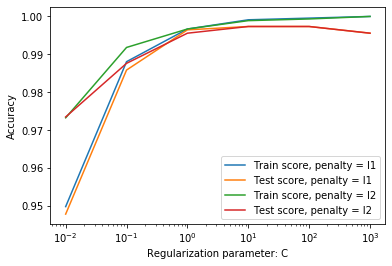

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

This graph shows that the test accuracy peaks at C=1 and penalty= l1,this should be verified with cross-validation.

In [74]:
# Fitting the parameters from the graph
from sklearn.linear_model import LogisticRegression
classifier_Log = LogisticRegression(penalty = 'l1', C = 1)
classifier_Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier_Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier_Log.score(X_test, y_test)))

Train score: 0.9967
Test score: 0.9965


#### Logistic regression Cross-Validation (penalty:l1, C:1)

In [75]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(classifier_Log,X_train,y_train,cv=5)
test_score_list = cross_val_score(classifier_Log,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9942
Avg Test Score:0.9920


###  Summary for Logistic Regression


- The best parameters for Logistic Regression are {'C': 10, 'penalty': 'l2'}
- Before parameter tuning: Train score: 0.9967, Test score: 0.9956
- After parameter tuning: Train score: 0.9989, Test score: 0.9973
- Average scores: Avg Train Score:0.9967, Avg Test Score:0.9920

## <font color=blue>2. SVC with kernels = linear, rbf, poly </font>

In [56]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier.score(X_test, y_test)))

Train score: 0.9896
Test score: 0.9876


### SVC Confusion matrix

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       429
         1.0       0.98      1.00      0.99       700

    accuracy                           0.99      1129
   macro avg       0.99      0.98      0.99      1129
weighted avg       0.99      0.99      0.99      1129

accuracy: 0.9876


### SVC Gridsearch

In [112]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]},
            {'C': [1, 10, 100], 'kernel': ['poly'], 'degree': [0, 1, 2, 3, 4, 5]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

In [113]:
accuracy = grid_search.best_score_
accuracy

0.9995570321151717

#### Fitting SVC with the best parameters from Gridsearch

In [114]:
# Fitting Kernel SVM to the Training set with the grid search parameters 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 0.5, C = 1)
classifier.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9973


#### SVC Cross-Validation (kernel = 'rbf', gamma = 0.5, C = 1)

In [115]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(classifier,X_train,y_train,cv=5)
test_score_list = cross_val_score(classifier,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9996
Avg Test Score:0.9911


In [116]:
from sklearn.svm import SVC

c_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_linear = []
train_score_rbf = []
train_score_poly = []
test_score_linear = []
test_score_rbf = []
test_score_poly = []

for c in c_range:
    linear = SVC(kernel = 'linear', C = c)
    rbf = SVC(kernel = 'rbf', C = c, gamma = 0.2)
    poly = SVC(kernel = 'poly', C = c)
    linear.fit(X_train, y_train)
    rbf.fit(X_train, y_train)
    poly.fit(X_train, y_train)
    train_score_linear.append(linear.score(X_train, y_train))
    train_score_rbf.append(rbf.score(X_train, y_train))
    train_score_poly.append(poly.score(X_train, y_train))
    test_score_linear.append(linear.score(X_test, y_test))
    test_score_rbf.append(rbf.score(X_test, y_test))
    test_score_poly.append(poly.score(X_test, y_test))
    

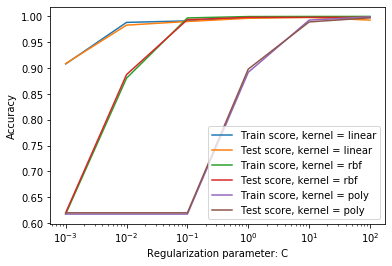

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(c_range, train_score_linear, label = 'Train score, kernel = linear')
plt.plot(c_range, test_score_linear, label = 'Test score, kernel = linear')
plt.plot(c_range, train_score_rbf, label = 'Train score, kernel = rbf')
plt.plot(c_range, test_score_rbf, label = 'Test score, kernel = rbf')
plt.plot(c_range, train_score_poly, label = 'Train score, kernel = poly')
plt.plot(c_range, test_score_poly, label = 'Test score, kernel = poly')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

#### looks like when C = 10 we are reaching best accuracy

In [118]:
# Fitting Kernel SVM to the Training set with the grid search parameters 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 0.2, C = 10)
classifier.fit(X_train, y_train)
print('Train score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test score: {:.4f}'.format(classifier.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9982


### SVC Cross-Validation (kernel = 'rbf', gamma = 0.5, C = 10)

In [119]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(classifier,X_train,y_train,cv=5)
test_score_list = cross_val_score(classifier,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9993
Avg Test Score:0.9965


### Summary

- From the gridsearch, the best parameters are: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}.
- A visual representation of various kernels with parameters shows that C:10, gamma:0.5, kernal:rbf improves the test accuracy but with these parameters
- The best train and test accuracies of SVM-kernal are Train score: 1.0000, Test score: 0.9982.
- Average Train and test scrores are Avg Train Score:0.9993, Avg Test Score:0.9965   

##  <font color=blue>3. LinearSVC  </font>

In [83]:
from sklearn.svm import LinearSVC

clf = LinearSVC(dual = False)
clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test, y_test)))

Train score: 0.9989
Test score: 0.9982


### LinearSVC Confusion matrix

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       429
         1.0       1.00      1.00      1.00       700

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

accuracy: 0.9982


### LinearSVC Gridsearch

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 1, 'penalty': 'l2'}

In [86]:
accuracy = grid_search.best_score_
accuracy

0.9960132890365448

#### Fitting LinearSVC with best parameters from gridsearch

In [87]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty = 'l1', C= 1, dual=False)
clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test, y_test)))

Train score: 0.9987
Test score: 0.9982


C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### LinearSVC Cross-validation

In [88]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(clf,X_train,y_train,cv=5)
test_score_list = cross_val_score(clf,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Avg Train Score:0.9953
Avg Test Score:0.9911


C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [89]:
from sklearn.svm import LinearSVC

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    lin_l1 = LinearSVC(penalty = 'l1', C = c, dual = False)
    lin_l2 = LinearSVC(penalty = 'l2', C = c, dual = False)
    lin_l1.fit(X_train, y_train)
    lin_l2.fit(X_train, y_train)
    train_score_l1.append(lin_l1.score(X_train, y_train))
    train_score_l2.append(lin_l2.score(X_train, y_train))
    test_score_l1.append(lin_l1.score(X_test, y_test))
    test_score_l2.append(lin_l2.score(X_test, y_test))

C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


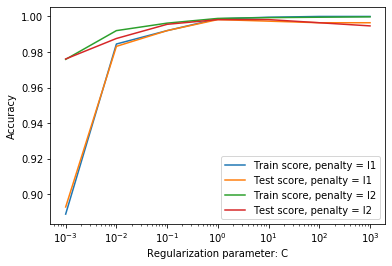

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

#### Fitting LinearSVC with l2 penalty to check the average scores

In [91]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty = 'l2', C= 1, dual=False)
clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test, y_test)))

Train score: 0.9989
Test score: 0.9982


#### LinearSVC Cross-Validation with l2 penalty

In [92]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(clf,X_train,y_train,cv=5)
test_score_list = cross_val_score(clf,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9962
Avg Test Score:0.9920


## Linear SVC Summary

-At C=1, both l1 and l2 yield same test accuracies
-Best parameters for Linear SVC are {C=1, penalty='l2'}.
-Best accuracies are: Train score: 0.9989, Test score: 0.9982
-Best average scores are: Avg Train Score:0.9962 Avg Test Score:0.9920

##  <font color=blue>4. Decision Tree </font>

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9947


#### Decision Tree Confusion matrix

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       429
         1.0       0.99      1.00      1.00       700

    accuracy                           0.99      1129
   macro avg       1.00      0.99      0.99      1129
weighted avg       0.99      0.99      0.99      1129

accuracy: 0.9947


### Decision Tree Gridsearch

In [95]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
parameters = [{"max_depth": [1,2,3,4,5,6,7], "criterion": ["gini", "entropy"]}]
grid_search = GridSearchCV(estimator = dtree,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [96]:
accuracy = grid_search.best_score_
accuracy

0.9926910299003322

### Fitting Decision Tree with the best parameters from Gridsearch

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))

Train score: 0.9949
Test score: 0.9938


### Decision Tree Cross-Validation

In [121]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(dtree,X_train,y_train,cv=5)
test_score_list = cross_val_score(dtree,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9920
Avg Test Score:0.9805


In [122]:
from sklearn.tree import DecisionTreeClassifier

depth = [1,2,3,4,5,6,7,8,9]
train_score_g = []
train_score_e = []
test_score_g = []
test_score_e = []

for d in depth:
    dec_g = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dec_e = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dec_g.fit(X_train, y_train)
    dec_e.fit(X_train, y_train)
    train_score_g.append(dec_g.score(X_train, y_train))
    train_score_e.append(dec_e.score(X_train, y_train))
    test_score_g.append(dec_g.score(X_test, y_test))
    test_score_e.append(dec_e.score(X_test, y_test)) 

Text(0, 0.5, 'Accuracy')

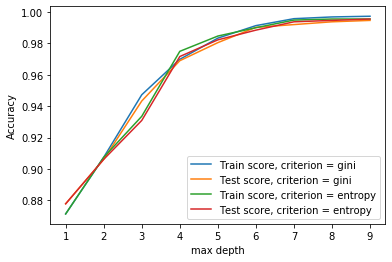

In [123]:
x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis, train_score_g, label = 'Train score, criterion = gini')
plt.plot(x_axis, test_score_g, label = 'Test score, criterion = gini')
plt.plot(x_axis, train_score_e, label = 'Train score, criterion = entropy')
plt.plot(x_axis, test_score_e, label = 'Test score, criterion = entropy')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('Accuracy')

### Decision Tree summary

- Both the graph and gridsearch show that the best parameters are criterion = 'entropy', max_depth = 7
- The best accuracy scores are: Train score: 0.9949, Test score: 0.9938
- The best average scores are: Avg Train Score:0.9920, Avg Test Score:0.9805

##  <font color=blue>5. KNN  </font>

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9996
Test score: 0.9973


### KNN Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_test,y_pred)
print('accuracy: {:.4f}'.format(accuracy))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       429
         1.0       1.00      1.00      1.00       700

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

accuracy: 0.9973


### KNN Grid Search

In [103]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': list(range(3,10)), 'leaf_size': list(range(1,5)), 'weights':['uniform', 'distance'], 'p': [1,2]}]
grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'leaf_size': 1, 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [104]:
accuracy = grid_search.best_score_
accuracy

0.9993355481727575

### Fitting KNN with the best parameters from Gridsearch

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(leaf_size= 1, n_neighbors =6, p = 1, weights = 'distance')
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9973


### KNN Cross-validation with leaf_size= 1, n_neighbors = 6, p = 1, weights = 'distance'

In [107]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(knn,X_train,y_train,cv=5)
test_score_list = cross_val_score(knn,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9993
Avg Test Score:0.9929


### Finding best K using graph

In [108]:
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn = KNeighborsClassifier(leaf_size= 1, n_neighbors = k, p = 1, weights = 'distance')
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

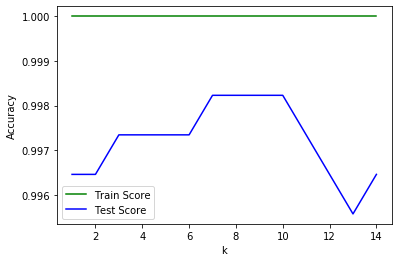

In [109]:
x_axis = range(1,15)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#### Test score  at k=7 looks like the best value

In [110]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors = 7, p = 1, weights = 'distance')
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9982


### KNN Cross-Validation with leaf_size= 1, n_neighbors = 7, p = 1, weights = 'distance'

In [111]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(knn,X_train,y_train,cv=5)
test_score_list = cross_val_score(knn,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9991
Avg Test Score:0.9920


## KNN Summary
- Though the test accuracies are amlost at k = 6 and 7, the average test accuracy when k=6 is higher.
- The best parameters are leaf_size= 1, n_neighbors = 6, p = 1, weights = 'distance'
- The best accuracies are: Train score: 1.0000, Test score: 0.9973
- The best average scores are: Avg Train Score:0.9993, Avg Test Score:0.9929

## Classification models summary

In [124]:
Models= {'classification Models':['Logistic Regrerssion','SVC Kernels','Linear SVC', 'Decision Tree','KNN'], 'Without_Hyperparameter_Tuning':[0.9956,0.9876,0.9982,0.9947,0.9973],
          'With_Hyperparameter_Tuning': [0.9973,0.9982,0.9982,0.9938,0.9973], 'Average Test score': [0.9920,0.9965,0.9920,0.9805,0.9929]}
Models_scores = pd.DataFrame(Models)
Models_scores

,classification Models,Without_Hyperparameter_Tuning,With_Hyperparameter_Tuning,Average Test score
0,Logistic Regrerssion,0.9956,0.9973,0.9920
1,SVC Kernels,0.9876,0.9982,0.9965
2,Linear SVC,0.9982,0.9982,0.9920
3,Decision Tree,0.9947,0.9938,0.9805
4,KNN,0.9973,0.9973,0.9929


## To justify the Accuracies
### The consistency of the performance shows that the there is no overfitting and the relationship between the features and target variable is simplistic
